<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introduction to Logistic Regression](#1)
2.	[Logistic Regression intuition](#2)
3.	[Assumptions of Logistic Regression](#3)
4.	[Types of Logistic Regression](#4)
5.	[Import libraries](#5)
6.	[Import dataset](#6)
7.	[Exploratory data analysis](#7)
8.	[Declare feature vector and target variable](#8)
9.	[Split data into separate training and test set](#9)
10.	[Feature engineering](#10)
11.	[Feature scaling](#11)
12.	[Model training](#12)
13.	[Predict results](#13)
14.	[Check accuracy score](#14)
15.	[Confusion matrix](#15)
16.	[Classification metrices](#16)
17.	[Adjusting the threshold level](#17)
18.	[ROC - AUC](#18)
19.	[k-Fold Cross Validation](#19)
20.	[Results and conclusion](#20)


# **1. Introduction to Logistic Regression** <a class="anchor" id="1"></a>


[Table of Contents](#0.1)


When data scientists may come across a new classification problem, the first algorithm that may come across their mind is **Logistic Regression**. It is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. **Logistic Regression** is also called **Logit Regression**. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.

# **2. Logistic Regression intuition** <a class="anchor" id="2"></a>


[Table of Contents](#0.1)


In statistics, the **Logistic Regression model** is a widely used statistical model which is primarily used for classification purposes. It means that given a set of observations, Logistic Regression algorithm helps us to classify these observations into two or more discrete classes. So, the target variable is discrete in nature.


The Logistic Regression algorithm works as follows -

## **Implement linear equation**


Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. For example, we consider the example of number of hours studied and probability of passing the exam. Here, number of hours studied is the explanatory variable and it is denoted by x1. Probability of passing the exam is the response or target variable and it is denoted by z.


If we have one explanatory variable (x1) and one response variable (z), then the linear equation would be given mathematically with the following equation-

    z = β0 + β1x1    

Here, the coefficients β0 and β1 are the parameters of the model.


If there are multiple explanatory variables, then the above equation can be extended to

    z = β0 + β1x1+ β2x2+……..+ βnxn
    
Here, the coefficients β0, β1, β2 and βn are the parameters of the model.

So, the predicted response value is given by the above equations and is denoted by z.

## **Sigmoid Function**

This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.

In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an S shaped curve. It is also called sigmoid curve.

A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.

Graphically, we can represent sigmoid function with the following graph.

### Sigmoid Function

![Sigmoid Function](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

## **Decision boundary**

The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below-

![Decision boundary in sigmoid function](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_regression_sigmoid_w_threshold.png)

## **Making predictions**

Now, we know about sigmoid function and decision boundary in logistic regression. We can use our knowledge of sigmoid function and decision boundary to write a prediction function. A prediction function in logistic regression returns the probability of the observation being positive, Yes or True. We call this as class 1 and it is denoted by P(class = 1). If the probability inches closer to one, then we will be more confident about our model that the observation is in class 1, otherwise it is in class 0.


# **3. Assumptions of Logistic Regression** <a class="anchor" id="3"></a>


[Table of Contents](#0.1)


The Logistic Regression model requires several key assumptions. These are as follows:-

1. Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

2. It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

4. Logistic Regression model assumes linearity of independent variables and log odds.

5. The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

# **4. Types of Logistic Regression** <a class="anchor" id="4"></a>


[Table of Contents](#0.1)


Logistic Regression model can be classified into three groups based on the target variable categories. These three groups are described below:-

### 1. Binary Logistic Regression

In Binary Logistic Regression, the target variable has two possible categories. The common examples of categories are yes or no, good or bad, true or false, spam or no spam and pass or fail.


### 2. Multinomial Logistic Regression

In Multinomial Logistic Regression, the target variable has three or more categories which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - apple, mango, orange and banana.


### 3. Ordinal Logistic Regression

In Ordinal Logistic Regression, the target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as poor, average, good and excellent.


# **5. Import libraries** <a class="anchor" id="5"></a>


[Table of Contents](#0.1)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
# %matplotlib inline
import os


In [2]:
import warnings

warnings.filterwarnings('ignore')

# **6. Import dataset** <a class="anchor" id="6"></a>


[Table of Contents](#0.1)

In [3]:
data = '/content/weatherAUS.csv'

df = pd.read_csv(data)

# **7. Exploratory data analysis** <a class="anchor" id="7"></a>


[Table of Contents](#0.1)


Now, I will explore the data to gain insights about the data.

In [4]:
# view dimensions of dataset

df.shape

(31977, 24)

We can see that there are 142193 instances and 24 variables in the data set.

In [5]:
# preview the dataset

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

### Drop  RISK_MM variable

It is given in the dataset description, that we should drop the `RISK_MM` feature variable from the dataset description. So, we
should drop it as follows-

In [7]:
df.drop(['RISK_MM'], axis=1, inplace=True)

Fill the Gap to see the required output

In [8]:
# view summary of dataset

df.info

<bound method DataFrame.info of              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0      2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1      2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2      2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3      2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4      2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...           ...      ...      ...      ...       ...          ...       ...   
31972  2015-02-15   Sydney     20.3     29.4       0.6          5.6       8.8   
31973  2015-02-16   Sydney     22.1     28.0       0.0          8.0      11.1   
31974  2015-02-17   Sydney     21.9     27.8       0.0          8.4      12.2   
31975  2015-02-18   Sydney     22.2     27.6       0.0         10.4      12.2   
31976  2015-02-19   Sydney     22.2     27.6       0.2          9.6       5.1   

      WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0               W           44.0          W  ...        71.0         22.0   
1             WNW           44.0        NNW  ...        44.0         25.0   
2             WSW           46.0          W  ...        38.0         30.0   
3              NE           24.0         SE  ...        45.0         16.0   
4               W           41.0        ENE  ...        82.0         33.0   
...           ...            ...        ...  ...         ...          ...   
31972          NE           37.0          N  ...        85.0         59.0   
31973          NE           46.0         NE  ...        62.0         57.0   
31974          NE           48.0        NNE  ...        59.0         56.0   
31975           E           41.0         NE  ...        59.0         60.0   
31976         ENE           39.0        ENE  ...        88.0         63.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0           1007.7       1007.1       8.0       NaN     16.9     21.8   
1           1010.6       1007.8       NaN       NaN     17.2     24.3   
2           1007.6       1008.7       NaN       2.0     21.0     23.2   
3           1017.6       1012.8       NaN       NaN     18.1     26.5   
4           1010.8       1006.0       7.0       8.0     17.8     29.7   
...            ...          ...       ...       ...      ...      ...   
31972       1017.0       1014.8       7.0       3.0     22.4     26.4   
31973       1016.9       1015.7       3.0       7.0     25.4     26.8   
31974       1019.0       1017.6       3.0       2.0     25.7     26.1   
31975       1019.9       1019.0       2.0       2.0     26.4     26.7   
31976       1021.8       1019.4       7.0       5.0     23.0     25.8   

       RainToday  RainTomorrow  
0             No            No  
1             No            No  
2             No            No  
3             No            No  
4             No            No  
...          ...           ...  
31972         No            No  
31973         No            No  
31974         No            No  
31975         No            No  
31976         No            No  

[31977 rows x 23 columns]>

### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.


First of all, I will find categorical variables.

In [9]:
# find categorical variables
#Fill the Gap

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [10]:
# view the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


### Summary of categorical variables


- There is a date variable. It is denoted by `Date` column.


- There are 6 categorical variables. These are given by `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` and  `RainTomorrow`.


- There are two binary categorical variables - `RainToday` and  `RainTomorrow`.


- `RainTomorrow` is the target variable.

## Explore problems within categorical variables


First, I will explore the categorical variables.


### Missing values in categorical variables

In [11]:
# check missing values in categorical variables
# Fill the Gap

df[categorical].isnull().sum()

,0
Date,0
Location,0
WindGustDir,4485
WindDir9am,4219
WindDir3pm,1893
RainToday,346
RainTomorrow,0


In [12]:
# print categorical variables containing missing values
# Fill the Gap


cat1 = [var for var in  categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir    4485
WindDir9am     4219
WindDir3pm     1893
RainToday       346
dtype: int64


We can see that there are only 4 categorical variables in the dataset which contains missing values. These are `WindGustDir`, `WindDir9am`, `WindDir3pm` and `RainToday`.

### Frequency counts of categorical variables


Now, I will check the frequency counts of categorical variables.

In [13]:
# view frequency of categorical variables

for var in categorical:

    print(df[var].value_counts())

Date
2015-02-15    11
2015-02-16    11
2015-02-17    11
2015-02-18    11
2015-02-05    11
              ..
2008-02-16     1
2008-02-15     1
2008-02-14     1
2008-02-13     1
2008-02-06     1
Name: count, Length: 3344, dtype: int64
Location
Albury           3011
Cobar            2988
Penrith          2964
NorfolkIsland    2964
Newcastle        2955
CoffsHarbour     2953
Richmond         2951
NorahHead        2929
BadgerysCreek    2928
Moree            2854
Sydney           2480
Name: count, dtype: int64
WindGustDir
NE     2215
NNE    2215
SW     2095
ENE    2008
E      2002
W      1978
S      1946
SSW    1918
WSW    1851
SE     1675
SSE    1634
ESE    1574
WNW    1444
N      1240
NW      952
NNW     745
Name: count, dtype: int64
WindDir9am
SW     2627
SSW    2095
W      2014
NNE    1993
N      1973
NE     1920
SE     1887
S      1730
E      1692
NW     1662
WSW    1588
SSE    1449
ESE    1370
ENE    1346
WNW    1284
NNW    1128
Name: count, dtype: int64
WindDir3pm
SE     3022
NE     29

In [14]:
# view frequency distribution of categorical variables

for var in categorical:

    print(df[var].value_counts()/float(len(df)))

Date
2015-02-15    0.000344
2015-02-16    0.000344
2015-02-17    0.000344
2015-02-18    0.000344
2015-02-05    0.000344
                ...   
2008-02-16    0.000031
2008-02-15    0.000031
2008-02-14    0.000031
2008-02-13    0.000031
2008-02-06    0.000031
Name: count, Length: 3344, dtype: float64
Location
Albury           0.094161
Cobar            0.093442
Penrith          0.092692
NorfolkIsland    0.092692
Newcastle        0.092410
CoffsHarbour     0.092348
Richmond         0.092285
NorahHead        0.091597
BadgerysCreek    0.091566
Moree            0.089252
Sydney           0.077556
Name: count, dtype: float64
WindGustDir
NE     0.069269
NNE    0.069269
SW     0.065516
ENE    0.062795
E      0.062607
W      0.061857
S      0.060856
SSW    0.059981
WSW    0.057885
SE     0.052381
SSE    0.051099
ESE    0.049223
WNW    0.045157
N      0.038778
NW     0.029771
NNW    0.023298
Name: count, dtype: float64
WindDir9am
SW     0.082153
SSW    0.065516
W      0.062983
NNE    0.062326
N     

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [15]:
# check for cardinality in categorical variables
# Fill the Gap


for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3344  labels
Location  contains  11  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


We can see that there is a `Date` variable which needs to be preprocessed. I will do preprocessing in the following section.


All the other variables contain relatively smaller number of variables.

### Feature Engineering of Date Variable

In [16]:
df['Date'].dtypes

dtype('O')

We can see that the data type of `Date` variable is object. I will parse the date currently coded as object into datetime format.

Fill the Gap

In [17]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [18]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

,Year
0,2008
1,2008
2,2008
3,2008
4,2008


In [19]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

,Month
0,12
1,12
2,12
3,12
4,12


In [20]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

,Day
0,1
1,2
2,3
3,4
4,5


In [21]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31977 entries, 0 to 31976
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           31977 non-null  datetime64[ns]
 1   Location       31977 non-null  object        
 2   MinTemp        31629 non-null  float64       
 3   MaxTemp        31793 non-null  float64       
 4   Rainfall       31631 non-null  float64       
 5   Evaporation    13478 non-null  float64       
 6   Sunshine       9135 non-null   float64       
 7   WindGustDir    27492 non-null  object        
 8   WindGustSpeed  27496 non-null  float64       
 9   WindDir9am     27758 non-null  object        
 10  WindDir3pm     30084 non-null  object        
 11  WindSpeed9am   31348 non-null  float64       
 12  WindSpeed3pm   30699 non-null  float64       
 13  Humidity9am    31480 non-null  float64       
 14  Humidity3pm    30812 non-null  float64       
 15  Pressure9am    2556

We can see that there are three additional columns created from `Date` variable. Now, I will drop the original `Date` variable from the dataset.

In [22]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [23]:
# preview the dataset again

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


Now, we can see that the `Date` variable has been removed from the dataset.


### Explore Categorical Variables


Now, I will explore the categorical variables one by one.

In [24]:
# find categorical variables
# Fill the Gap

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


We can see that there are 6 categorical variables in the dataset. The `Date` variable has been removed. First, I will check missing values in categorical variables.

In [25]:
# check for missing values in categorical variables

df[categorical].isnull().sum()

,0
Location,0
WindGustDir,4485
WindDir9am,4219
WindDir3pm,1893
RainToday,346
RainTomorrow,0


We can see that `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` variables contain missing values. I will explore these variables one by one.

### Explore `Location` variable

In [26]:
# print number of labels in Location variable
# Fill the Gap

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 11 labels


In [27]:
# check labels in location variable

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney'], dtype=object)

In [28]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

,count
Location,
Albury,3011
Cobar,2988
Penrith,2964
NorfolkIsland,2964
Newcastle,2955
CoffsHarbour,2953
Richmond,2951
NorahHead,2929
BadgerysCreek,2928


In [29]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,BadgerysCreek,Cobar,CoffsHarbour,Moree,Newcastle,NorahHead,NorfolkIsland,Penrith,Richmond,Sydney
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


### Explore `WindGustDir` variable

In [30]:
# print number of labels in WindGustDir variable
# Fill the Gap

print('WindGustDir contains', len(df.WindGustDir.unique()), 'labels')

WindGustDir contains 17 labels


In [31]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [32]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

,count
WindGustDir,
NE,2215
NNE,2215
SW,2095
ENE,2008
E,2002
W,1978
S,1946
SSW,1918
WSW,1851


In [33]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [34]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

,0
ENE,2008
ESE,1574
N,1240
NE,2215
NNE,2215
NNW,745
NW,952
S,1946
SE,1675
SSE,1634


We can see that there are 9330 missing values in WindGustDir variable.

### Explore `WindDir9am` variable

In [35]:
# print number of labels in WindDir9am variable
# Fill the Gap

print('WindDir9am contains', len(df.WindDir9am.unique()), 'labels')

WindDir9am contains 17 labels


In [36]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [37]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

,count
WindDir9am,
SW,2627
SSW,2095
W,2014
NNE,1993
N,1973
NE,1920
SE,1887
S,1730
E,1692


In [38]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

,0
ENE,1346
ESE,1370
N,1973
NE,1920
NNE,1993
NNW,1128
NW,1662
S,1730
SE,1887
SSE,1449


We can see that there are 10013 missing values in the `WindDir9am` variable.

### Explore `WindDir3pm` variable

In [40]:
# print number of labels in WindDir3pm variable
# Fill the Gap

print('WindDir3pm contains', len(df.WindDir3pm.unique()), 'labels')

WindDir3pm contains 17 labels


In [41]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [42]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

,count
WindDir3pm,
SE,3022
NE,2920
E,2267
S,2150
ENE,1921
ESE,1920
SSE,1913
NNE,1870
W,1791


In [43]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [44]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

,0
ENE,1921
ESE,1920
N,1516
NE,2920
NNE,1870
NNW,859
NW,1425
S,2150
SE,3022
SSE,1913


There are 3778 missing values in the `WindDir3pm` variable.

### Explore `RainToday` variable

In [45]:
# print number of labels in RainToday variable
# Fill the Gap

print('RainToday contains', len(df.RainToday.unique()), 'labels')

RainToday contains 3 labels


In [46]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [47]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

,count
RainToday,
No,24612
Yes,7019


In [48]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [49]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

,0
Yes,7019
NaN,346


There are 1406 missing values in the `RainToday` variable.

### Explore Numerical Variables

In [50]:
# find numerical variables
# Fill the Gap

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [51]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


### Summary of numerical variables


- There are 16 numerical variables.


- These are given by `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` and `Temp3pm`.


- All of the numerical variables are of continuous type.

## Explore problems within numerical variables


Now, I will explore the numerical variables.


### Missing values in numerical variables

In [52]:
# check missing values in numerical variables

df[numerical].isnull().sum()

,0
MinTemp,348
MaxTemp,184
Rainfall,346
Evaporation,18499
Sunshine,22842
WindGustSpeed,4481
WindSpeed9am,629
WindSpeed3pm,1278
Humidity9am,497
Humidity3pm,1165


We can see that all the 16 numerical variables contain missing values.

### Outliers in numerical variables

In [53]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  31629.0  31793.0   31631.0      13478.0    9135.0        27496.0   
mean      13.0     24.0       3.0          6.0       8.0           37.0   
std        6.0      6.0       9.0          5.0       4.0           13.0   
min       -5.0      7.0       0.0          0.0       0.0            7.0   
25%        9.0     20.0       0.0          3.0       5.0           28.0   
50%       14.0     23.0       0.0          5.0       9.0           35.0   
75%       18.0     28.0       1.0          7.0      10.0           44.0   
max       30.0     47.0     371.0         86.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count       31348.0       30699.0      31480.0      30812.0      25564.0   
mean           12.0          17.0         71.0         52.0       1018.0   
std             9.0           9.0         18.0         21.0          7.0   
min             0.0 

On closer inspection, we can see that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns may contain outliers.


I will draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'WindSpeed3pm')

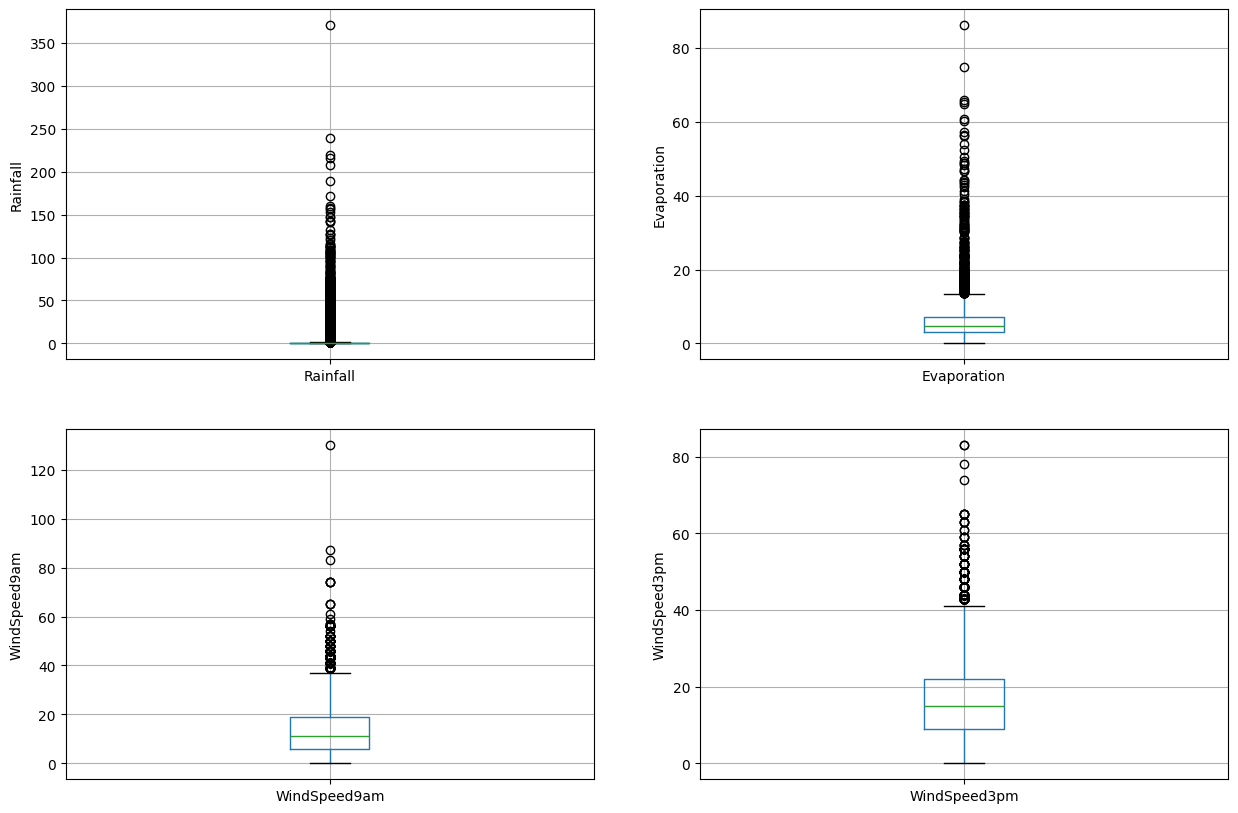

In [54]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2,2,1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2,2,2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2,2,4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

The above boxplots confirm that there are lot of outliers in these variables.

### Check the distribution of variables


Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do `Extreme Value Analysis` otherwise if they are skewed, I will find IQR (Interquantile range).

Text(0, 0.5, 'RainTomorrow')

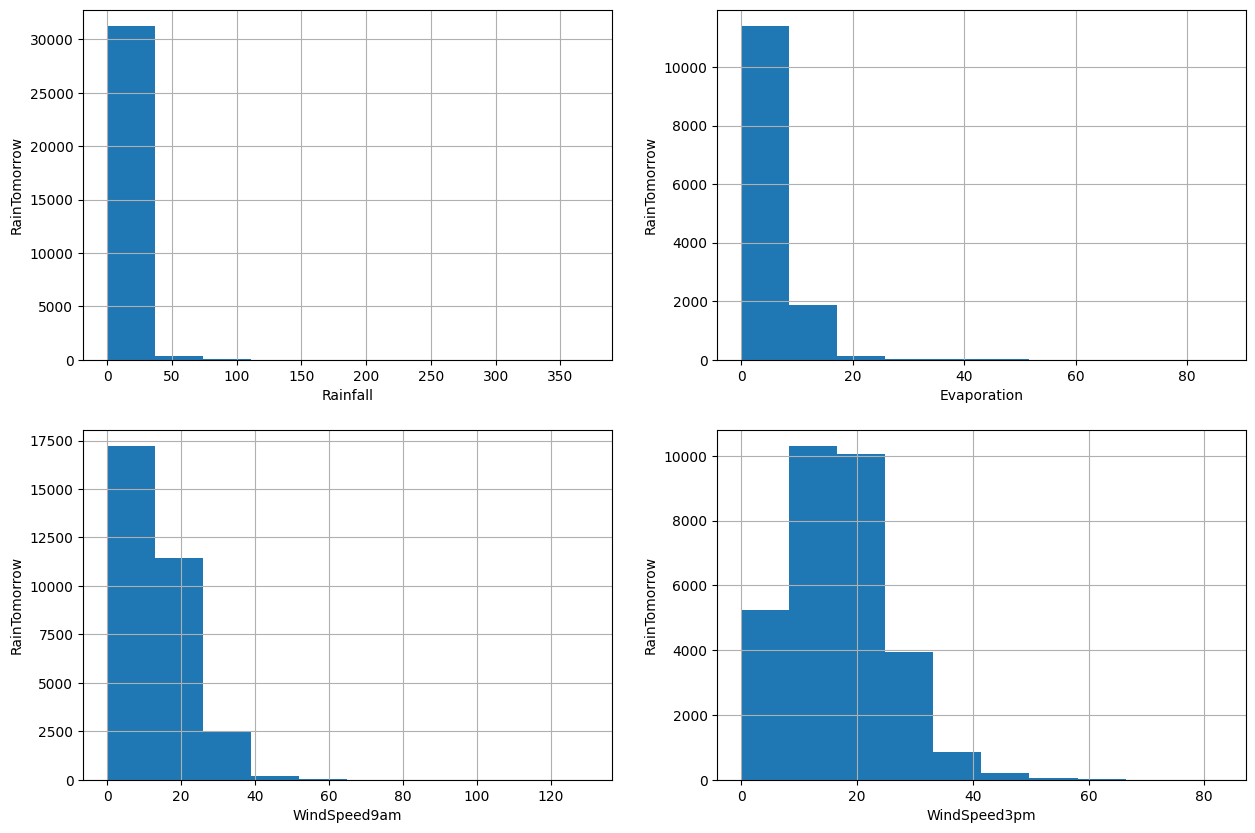

In [55]:
# plot histogram to check distribution
# Fill the Gap

plt.figure(figsize=(15,10))


plt.subplot(2,2,1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2,2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2,2,3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2,2,4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

## Search and learn how we have reached to this formula.

We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.

Learn about outliers, what does qunatile and interquantile means.

In [56]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -1.7999999999999998 or > 2.4


For `Rainfall`, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [57]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -9.600000000000001 or > 19.8


For `Evaporation`, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

In [58]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed9am outliers are values < -33.0 or > 58.0


For `WindSpeed9am`, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0.

In [59]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -30.0 or > 61.0


For `WindSpeed3pm`, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0.

# **8. Declare feature vector and target variable** <a class="anchor" id="8"></a>


[Table of Contents](#0.1)

In [60]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

# **9. Split data into separate training and test set** <a class="anchor" id="9"></a>


[Table of Contents](#0.1)

In [61]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [63]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((25581, 24), (6396, 24))

# **10. Feature Engineering** <a class="anchor" id="10"></a>


[Table of Contents](#0.1)


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will display the categorical and numerical variables again separately.

In [64]:
# check data types in X_train

X_train.dtypes

,0
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object
WindDir3pm,object


In [66]:
# display categorical variables
# Fill the Gap

categorical = [ col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [68]:
# display numerical variables
# Fill the Gap

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

### Engineering missing values in numerical variables



In [70]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

,0
MinTemp,289
MaxTemp,140
Rainfall,279
Evaporation,14767
Sunshine,18230
WindGustSpeed,3528
WindSpeed9am,501
WindSpeed3pm,1027
Humidity9am,403
Humidity3pm,950


In [72]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

,0
MinTemp,59
MaxTemp,44
Rainfall,67
Evaporation,3732
Sunshine,4612
WindGustSpeed,953
WindSpeed9am,128
WindSpeed3pm,251
Humidity9am,94
Humidity3pm,215


In [74]:
# print percentage of missing values in the numerical variables in training set
# Fill the Gap

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0113
MaxTemp 0.0055
Rainfall 0.0109
Evaporation 0.5773
Sunshine 0.7126
WindGustSpeed 0.1379
WindSpeed9am 0.0196
WindSpeed3pm 0.0401
Humidity9am 0.0158
Humidity3pm 0.0371
Pressure9am 0.1984
Pressure3pm 0.1986
Cloud9am 0.4779
Cloud3pm 0.4901
Temp9am 0.0089
Temp3pm 0.0303


### Assumption


I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.


I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [76]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)


In [77]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [78]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


Now, we can see that there are no missing values in the numerical columns of training and test set.

### Engineering missing values in categorical variables

In [79]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

,0
Location,0.000000
WindGustDir,0.138032
WindDir9am,0.132129
WindDir3pm,0.058989
RainToday,0.010907


In [80]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.13803213322387708
WindDir9am 0.13212931472577302
WindDir3pm 0.05898909346780814
RainToday 0.010906532191861147


In [83]:
# impute missing categorical variables with "most frequent value"
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode(), inplace=True)

In [84]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

,0
Location,0
WindGustDir,0
WindDir9am,0
WindDir3pm,0
RainToday,279


In [85]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

,0
Location,0
WindGustDir,0
WindDir9am,0
WindDir3pm,0
RainToday,67


As a final check, I will check for missing values in X_train and X_test.

In [86]:
# check missing values in X_train

X_train.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [87]:
# check missing values in X_test

X_test.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


We can see that there are no missing values in X_train and X_test.

### Engineering outliers in numerical variables


We have seen that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [88]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [89]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [90]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [91]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [92]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [93]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000
mean,13.204687,23.970631,0.679137,4.976064,8.393022,37.026426,11.993159,16.525781,70.642313,52.401783,1018.287135,1015.695593,4.646925,4.699464,17.754361,22.496118,2012.629373,6.393378,15.719870
std,5.776789,5.991654,1.195585,2.455685,2.069569,12.425494,8.841409,8.750128,17.460489,20.221553,5.903592,5.837003,2.158724,1.964337,5.327980,5.764974,2.505109,3.415760,8.807294
min,-4.800000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000,2008.000000,1.000000,1.000000
25%,9.000000,19.500000,0.000000,4.600000,8.700000,30.000000,6.000000,11.000000,59.000000,38.000000,1015.100000,1012.500000,5.000000,5.000000,14.000000,18.300000,2010.000000,3.000000,8.000000
50%,13.900000,23.400000,0.000000,4.600000,8.700000,35.000000,11.000000,15.000000,71.000000,53.000000,1018.400000,1015.800000,5.000000,5.000000,18.200000,21.900000,2013.000000,6.000000,16.000000
75%,17.800000,27.600000,0.600000,4.600000,8.700000,43.000000,17.000000,22.000000,83.000000,66.000000,1021.500000,1018.900000,5.000000,5.000000,21.700000,25.800000,2015.000000,9.000000,23.000000
max,29.400000,47.300000,3.200000,21.800000,14.000000,117.000000,55.000000,57.000000,100.000000,100.000000,1039.900000,1036.800000,9.000000,8.000000,37.700000,46.700000,2017.000000,12.000000,31.000000


We can now see that the outliers in `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns are capped.

### Encode categorical variables

In [94]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [95]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
2337,Albury,WSW,WNW,WNW,No
7266,Cobar,WNW,N,W,No
13379,Moree,SSW,NW,SSW,No
28639,Richmond,NE,NE,NNE,No
26162,Penrith,WNW,SW,W,NaN


In [96]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.4 MB/s eta 0:00:00


In [97]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [98]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
2337,Albury,5.5,14.2,0.0,4.6,8.7,WSW,43.0,WNW,WNW,...,1015.8,8.0,5.0,9.8,13.4,0,1,2015,8,17
7266,Cobar,12.7,30.1,0.0,7.2,8.7,WNW,43.0,N,W,...,1008.8,0.0,1.0,22.9,28.2,0,1,2012,9,23
13379,Moree,3.2,18.6,0.0,5.4,9.8,SSW,39.0,NW,SSW,...,1017.6,6.0,1.0,9.7,18.3,0,1,2013,5,20
28639,Richmond,18.9,30.9,0.4,4.6,8.7,NE,31.0,NE,NNE,...,1014.4,3.0,5.0,21.7,29.7,0,1,2015,2,16
26162,Penrith,6.5,17.1,0.0,4.6,8.7,WNW,33.0,SW,W,...,1015.8,5.0,5.0,8.8,17.1,1,1,2016,5,28


We can see that two additional variables `RainToday_0` and `RainToday_1` are created from `RainToday` variable.

Now, I will create the `X_train` training set.

In [99]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [100]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
2337,5.5,14.2,0.0,4.6,8.7,43.0,17.0,19.0,82.0,64.0,...,False,False,False,False,False,False,False,False,True,False
7266,12.7,30.1,0.0,7.2,8.7,43.0,17.0,22.0,18.0,13.0,...,False,False,False,False,False,False,False,True,False,False
13379,3.2,18.6,0.0,5.4,9.8,39.0,7.0,22.0,64.0,26.0,...,False,False,False,False,False,True,False,False,False,False
28639,18.9,30.9,0.4,4.6,8.7,31.0,2.0,13.0,92.0,46.0,...,False,False,False,False,False,False,False,False,False,False
26162,6.5,17.1,0.0,4.6,8.7,33.0,0.0,15.0,71.0,53.0,...,False,False,False,False,False,False,False,True,False,False


Similarly, I will create the `X_test` testing set.

In [101]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location),
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [102]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
17280,13.7,26.5,0.2,4.6,8.7,35.0,0.0,15.0,100.0,53.0,...,False,False,False,True,False,False,False,False,False,False
6156,8.0,20.5,0.0,2.4,9.9,26.0,13.0,9.0,50.0,31.0,...,False,False,False,False,False,False,False,False,False,False
5496,13.2,25.5,1.4,4.6,8.7,43.0,22.0,19.0,68.0,47.0,...,False,False,False,False,False,True,False,False,False,False
13703,13.7,26.1,3.2,18.0,8.2,30.0,4.0,7.0,65.0,46.0,...,False,False,False,False,False,False,False,False,False,False
5521,11.5,29.5,0.0,4.6,8.7,26.0,0.0,13.0,100.0,41.0,...,False,False,False,False,False,False,False,False,False,False


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

# **11. Feature Scaling** <a class="anchor" id="11"></a>


[Table of Contents](#0.1)

In [103]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1
count,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,...,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000
mean,13.204687,23.970631,0.679137,4.976064,8.393022,37.026426,11.993159,16.525781,70.642313,52.401783,...,1015.695593,4.646925,4.699464,17.754361,22.496118,2012.629373,6.393378,15.719870,0.231148,0.779758
std,5.776789,5.991654,1.195585,2.455685,2.069569,12.425494,8.841409,8.750128,17.460489,20.221553,...,5.837003,2.158724,1.964337,5.327980,5.764974,2.505109,3.415760,8.807294,0.421575,0.414418
min,-4.800000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,...,979.000000,0.000000,0.000000,0.300000,6.400000,2008.000000,1.000000,1.000000,0.000000,0.000000
25%,9.000000,19.500000,0.000000,4.600000,8.700000,30.000000,6.000000,11.000000,59.000000,38.000000,...,1012.500000,5.000000,5.000000,14.000000,18.300000,2010.000000,3.000000,8.000000,0.000000,1.000000
50%,13.900000,23.400000,0.000000,4.600000,8.700000,35.000000,11.000000,15.000000,71.000000,53.000000,...,1015.800000,5.000000,5.000000,18.200000,21.900000,2013.000000,6.000000,16.000000,0.000000,1.000000
75%,17.800000,27.600000,0.600000,4.600000,8.700000,43.000000,17.000000,22.000000,83.000000,66.000000,...,1018.900000,5.000000,5.000000,21.700000,25.800000,2015.000000,9.000000,23.000000,0.000000,1.000000
max,29.400000,47.300000,3.200000,21.800000,14.000000,117.000000,55.000000,57.000000,100.000000,100.000000,...,1036.800000,9.000000,8.000000,37.700000,46.700000,2017.000000,12.000000,31.000000,1.000000,1.000000


In [104]:
cols = X_train.columns

In [105]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [106]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [107]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [108]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,25581.000000,25581.000000,25581.00000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,...,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000,25581.000000
mean,0.526453,0.423966,0.21223,0.228260,0.599502,0.272968,0.218057,0.289926,0.697343,0.519210,...,0.027130,0.045385,0.066964,0.150854,0.060983,0.051640,0.054415,0.056018,0.047731,0.049881
std,0.168912,0.147942,0.37362,0.112646,0.147826,0.112959,0.160753,0.153511,0.180005,0.204258,...,0.162464,0.208152,0.249964,0.357914,0.239303,0.221303,0.226840,0.229961,0.213200,0.217703
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.403509,0.313580,0.00000,0.211009,0.621429,0.209091,0.109091,0.192982,0.577320,0.373737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.546784,0.409877,0.00000,0.211009,0.621429,0.254545,0.200000,0.263158,0.701031,0.525253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.660819,0.513580,0.18750,0.211009,0.621429,0.327273,0.309091,0.385965,0.824742,0.656566,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

# **12. Model training** <a class="anchor" id="12"></a>


[Table of Contents](#0.1)

In [109]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

# **13. Predict results** <a class="anchor" id="13"></a>


[Table of Contents](#0.1)

In [110]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

### predict_proba method


**predict_proba** method gives the probabilities for the target variable(0 and 1) in this case, in array form.

`0 is for probability of no rain` and `1 is for probability of rain.`

In [111]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.83833959, 0.98790496, 0.79718261, ..., 0.89039356, 0.91469667,
       0.63562917])

In [112]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.16166041, 0.01209504, 0.20281739, ..., 0.10960644, 0.08530333,
       0.36437083])

# **14. Check accuracy score** <a class="anchor" id="14"></a>


[Table of Contents](#0.1)

In [114]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test ,y_pred_test)))

Model accuracy score: 0.8457


Here, **y_test** are the true class labels and **y_pred_test** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [115]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [117]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8475


### Check for overfitting and underfitting

In [119]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train ,y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test ,y_test)))

Training set score: 0.8475
Test set score: 0.8457


The training-set accuracy score is 0.8476 while the test-set accuracy to be 0.8501. These two values are quite comparable. So, there is no question of overfitting.


In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

I will increase C and fit a more flexible model.


## What is C?

### Answer here

In [121]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [124]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train,y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test,y_test)))

Training set score: 0.8472
Test set score: 0.8472


We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [126]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train,y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [127]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train,y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test,y_test)))

Training set score: 0.8305
Test set score: 0.8319


So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relatiev to the default parameters.

### Compare model accuracy with null accuracy


So, the model accuracy is 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [128]:
# check class distribution in test set

y_test.value_counts()

,count
RainTomorrow,
No,4985
Yes,1411


We can see that the occurences of most frequent class is 22067. So, we can calculate null accuracy by dividing 22067 by total number of occurences.

In [129]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


We can see that our model accuracy score is 0.8501 but null accuracy score is 0.7759. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.


We have another tool called `Confusion matrix` that comes to our rescue.

# **15. Confusion matrix** <a class="anchor" id="15"></a>


[Table of Contents](#0.1)


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [131]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4719  266]
 [ 721  690]]

True Positives(TP) =  4719

True Negatives(TN) =  690

False Positives(FP) =  266

False Negatives(FN) =  721


The confusion matrix shows `20892 + 3285 = 24177 correct predictions` and `3087 + 1175 = 4262 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 20892


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 3285


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1175 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 3087 `(Type II error)`

<Axes: >

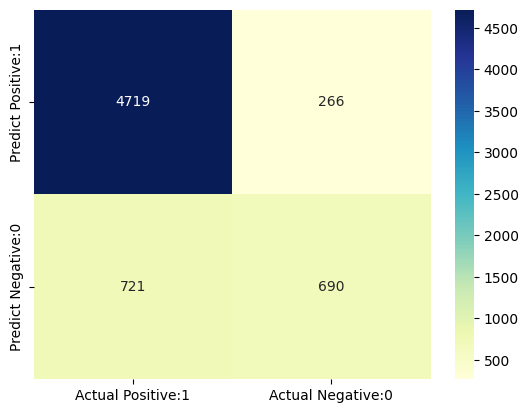

In [132]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **16. Classification metrices** <a class="anchor" id="16"></a>


[Table of Contents](#0.1)

## Classification Report
### Learn about all the metrics used in the report



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [134]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91      4985
         Yes       0.72      0.49      0.58      1411

    accuracy                           0.85      6396
   macro avg       0.79      0.72      0.74      6396
weighted avg       0.84      0.85      0.83      6396



## Classification accuracy

In [135]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [136]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8457


## Classification error

In [138]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1543


## Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP).`




In [139]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9466


## Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN).`





In [140]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8675


## True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [141]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8675


## False Positive Rate

In [142]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2782


## Specificity

In [144]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7218


## f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to
compare classifier models, not global accuracy.



## Support


**Support** is the actual number of occurrences of the class in our dataset.

# **17. Adjusting the threshold level** <a class="anchor" id="17"></a>


[Table of Contents](#0.1)

In [146]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.83833959, 0.16166041],
       [0.98790496, 0.01209504],
       [0.79718261, 0.20281739],
       [0.88991712, 0.11008288],
       [0.94627312, 0.05372688],
       [0.38389427, 0.61610573],
       [0.84737354, 0.15262646],
       [0.15479996, 0.84520004],
       [0.59734043, 0.40265957],
       [0.83444905, 0.16555095]])

### Observations


- In each row, the numbers sum to 1.


- There are 2 columns which correspond to 2 classes - 0 and 1.

    - Class 0 - predicted probability that there is no rain tomorrow.    
    
    - Class 1 - predicted probability that there is rain tomorrow.
        
    
- Importance of predicted probabilities

    - We can rank the observations by probability of rain or no rain.


- predict_proba process

    - Predicts the probabilities    
    
    - Choose the class with the highest probability    
    
    
- Classification threshold level

    - There is a classification threshold level of 0.5.    
    
    - Class 1 - probability of rain is predicted if probability > 0.5.    
    
    - Class 0 - probability of no rain is predicted if probability < 0.5.    
    


In [147]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.838340,0.161660
1,0.987905,0.012095
2,0.797183,0.202817
3,0.889917,0.110083
4,0.946273,0.053727
5,0.383894,0.616106
6,0.847374,0.152626
7,0.154800,0.845200
8,0.597340,0.402660
9,0.834449,0.165551


In [149]:
# print the first 10 predicted probabilities for class 1 - Probability of rain
# Fill the Gap

logreg.predict_proba(X_test)[0:10, 1]

array([0.16166041, 0.01209504, 0.20281739, 0.11008288, 0.05372688,
       0.61610573, 0.15262646, 0.84520004, 0.40265957, 0.16555095])

In [151]:
# store the predicted probabilities for class 1 - Probability of rain
# Fill the Gap

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

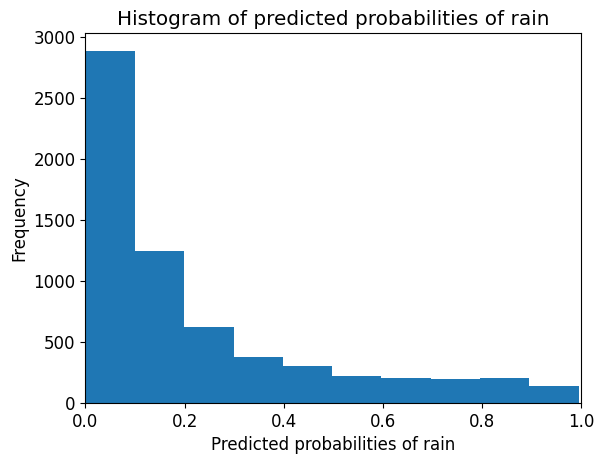

In [152]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

### Observations


- We can see that the above histogram is highly positive skewed.


- The first column tell us that there are approximately 15000 observations with probability between 0.0 and 0.1.


- There are small number of observations with probability > 0.5.


- So, these small number of observations predict that there will be rain tomorrow.


- Majority of observations predict that there will be no rain tomorrow.

### Lower the threshold

In [153]:
from sklearn.preprocessing import binarize

for i in range(1,5):

    cm1=0

    y_pred1 = logreg.predict_proba(X_test)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, threshold=i/10)

    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')

    cm1 = confusion_matrix(y_test, y_pred2)

    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',

            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',

            cm1[0,1],'Type I errors( False Positives), ','\n\n',

            cm1[1,0],'Type II errors( False Negatives), ','\n\n',

           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',

           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',

           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',

            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[2774 2211]
 [ 110 1301]] 

 with 4075 correct predictions,  

 2211 Type I errors( False Positives),  

 110 Type II errors( False Negatives),  

 Accuracy score:  0.6371169480925578 

 Sensitivity:  0.9220411055988661 

 Specificity:  0.5564694082246741 



With 0.2 threshold the Confusion Matrix is  

 [[3825 1160]
 [ 314 1097]] 

 with 4922 correct predictions,  

 1160 Type I errors( False Positives),  

 314 Type II errors( False Negatives),  

 Accuracy score:  0.7695434646654159 

 Sensitivity:  0.777462792345854 

 Specificity:  0.7673019057171514 



With 0.3 threshold the Confusion Matrix is  

 [[4308  677]
 [ 454  957]] 

 with 5265 correct predictions,  

 677 Type I errors( False Positives),  

 454 Type II errors( False Negatives),  

 Accuracy score:  0.823170731707317 

 Sensitivity:  0.6782423812898654 

 Specificity:  0.8641925777331996 



With 0.4 threshold the Confusion Matrix is  

 [[4564  421]
 [ 579  832]] 

 wi

### Comments


- In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.


- Threshold can be adjusted to increase sensitivity or specificity.


- Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.


- We can see that increasing the threshold level results in increased accuracy.


- Adjusting the threshold level should be one of the last step you do in the model-building process.

# **18. ROC - AUC** <a class="anchor" id="18"></a>


[Table of Contents](#0.1)



## ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various
classification threshold levels.



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN).`



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN).`




In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).



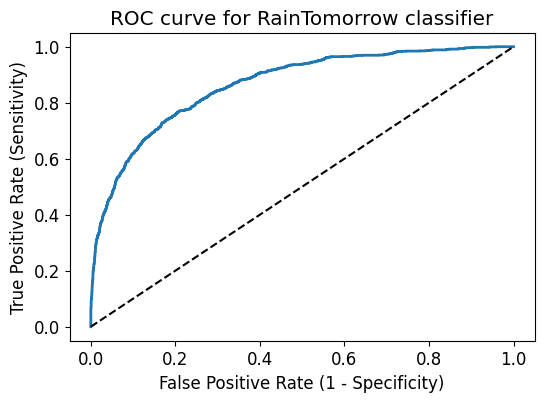

In [154]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

## ROC-AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [159]:
# compute ROC AUC
# Fill the Gap

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test,y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8639


### Comments


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [160]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8586


# **19. k-Fold Cross Validation** <a class="anchor" id="19"></a>


[Table of Contents](#0.1)

In [161]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84522181 0.84343237 0.84128225 0.84499609 0.85144644]


We can summarize the cross-validation accuracy by calculating its mean.

In [162]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8453


Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

# **21. Results and conclusion** <a class="anchor" id="21"></a>


[Table of Contents](#0.1)

1.	The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

2.	Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

3.	The model shows no signs of overfitting.

4.	Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

5.	Increasing the threshold level results in increased accuracy.

6.	ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

7.	Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced set of features.

8.	In the original model, we have FP = 1175 whereas FP1 = 1174. So, we get approximately same number of false positives. Also, FN = 3087 whereas FN1 = 3091. So, we get slighly higher false negatives.

9.	Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

